In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dados das máquinas da usina nuclear
dados = {
    'Idade': [5, 10, 3, 8, 1, 15],
    'Historico_Manutencao': ['Bom', 'Ruim', 'Excelente', 'Regular', 'Excelente', 'Ruim'],
    'Numero_Falhas': [0, 3, 0, 2, 0, 5],
    'Nivel_Automacao': ['Alto', 'Baixo', 'Médio', 'Alto', 'Médio', 'Baixo'],
    'Classificacao': ['Segura', 'Não Segura', 'Segura', 'Não Segura', 'Segura', 'Não Segura']
}

df = pd.DataFrame(dados)

print("="*60)
print("DADOS DAS MÁQUINAS DA USINA NUCLEAR")
print("="*60)
print(df)
print("\n")

DADOS DAS MÁQUINAS DA USINA NUCLEAR
   Idade Historico_Manutencao  Numero_Falhas Nivel_Automacao Classificacao
0      5                  Bom              0            Alto        Segura
1     10                 Ruim              3           Baixo    Não Segura
2      3            Excelente              0           Médio        Segura
3      8              Regular              2            Alto    Não Segura
4      1            Excelente              0           Médio        Segura
5     15                 Ruim              5           Baixo    Não Segura




In [3]:
# Convertendo variáveis categóricas para numéricas
# Histórico de Manutenção: Excelente=3, Bom=2, Regular=1, Ruim=0
historico_map = {'Excelente': 3, 'Bom': 2, 'Regular': 1, 'Ruim': 0}
df['Historico_Manutencao_num'] = df['Historico_Manutencao'].map(historico_map)

In [4]:
# Nível de Automação: Alto=2, Médio=1, Baixo=0
automacao_map = {'Alto': 2, 'Médio': 1, 'Baixo': 0}
df['Nivel_Automacao_num'] = df['Nivel_Automacao'].map(automacao_map)

In [5]:
# Preparando os dados para o modelo
X = df[['Idade', 'Historico_Manutencao_num', 'Numero_Falhas', 'Nivel_Automacao_num']].values
y = df['Classificacao'].values

In [6]:
# Dividindo em treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print("="*60)
print("DIVISÃO DOS DADOS")
print("="*60)
print(f"Dados de treino: {len(X_treino)} máquinas")
print(f"Dados de teste: {len(X_teste)} máquinas")
print("\n")

DIVISÃO DOS DADOS
Dados de treino: 4 máquinas
Dados de teste: 2 máquinas




In [7]:
# Criando e treinando o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [8]:
# Fazendo previsões
previsoes = modelo.predict(X_teste)

print("="*60)
print("RESULTADOS DAS PREVISÕES")
print("="*60)
print(f"Valores reais: {y_teste}")
print(f"Previsões: {previsoes}")
print("\n")

RESULTADOS DAS PREVISÕES
Valores reais: ['Segura' 'Não Segura']
Previsões: ['Segura' 'Não Segura']




In [9]:
# Calculando as métricas
acuracia = accuracy_score(y_teste, previsoes)
precisao = precision_score(y_teste, previsoes, pos_label='Segura', zero_division=0)
recall = recall_score(y_teste, previsoes, pos_label='Segura', zero_division=0)
f1 = f1_score(y_teste, previsoes, pos_label='Segura', zero_division=0)

print("="*60)
print("MÉTRICAS DO MODELO")
print("="*60)
print(f"Acurácia: {acuracia:.2%}")
print(f"Precisão: {precisao:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")
print("\n")

MÉTRICAS DO MODELO
Acurácia: 100.00%
Precisão: 100.00%
Recall: 100.00%
F1-Score: 100.00%




In [10]:
# Matriz de Confusão
cm = confusion_matrix(y_teste, previsoes, labels=['Segura', 'Não Segura'])
print("="*60)
print("MATRIZ DE CONFUSÃO")
print("="*60)
print(cm)
print("\n")

MATRIZ DE CONFUSÃO
[[1 0]
 [0 1]]




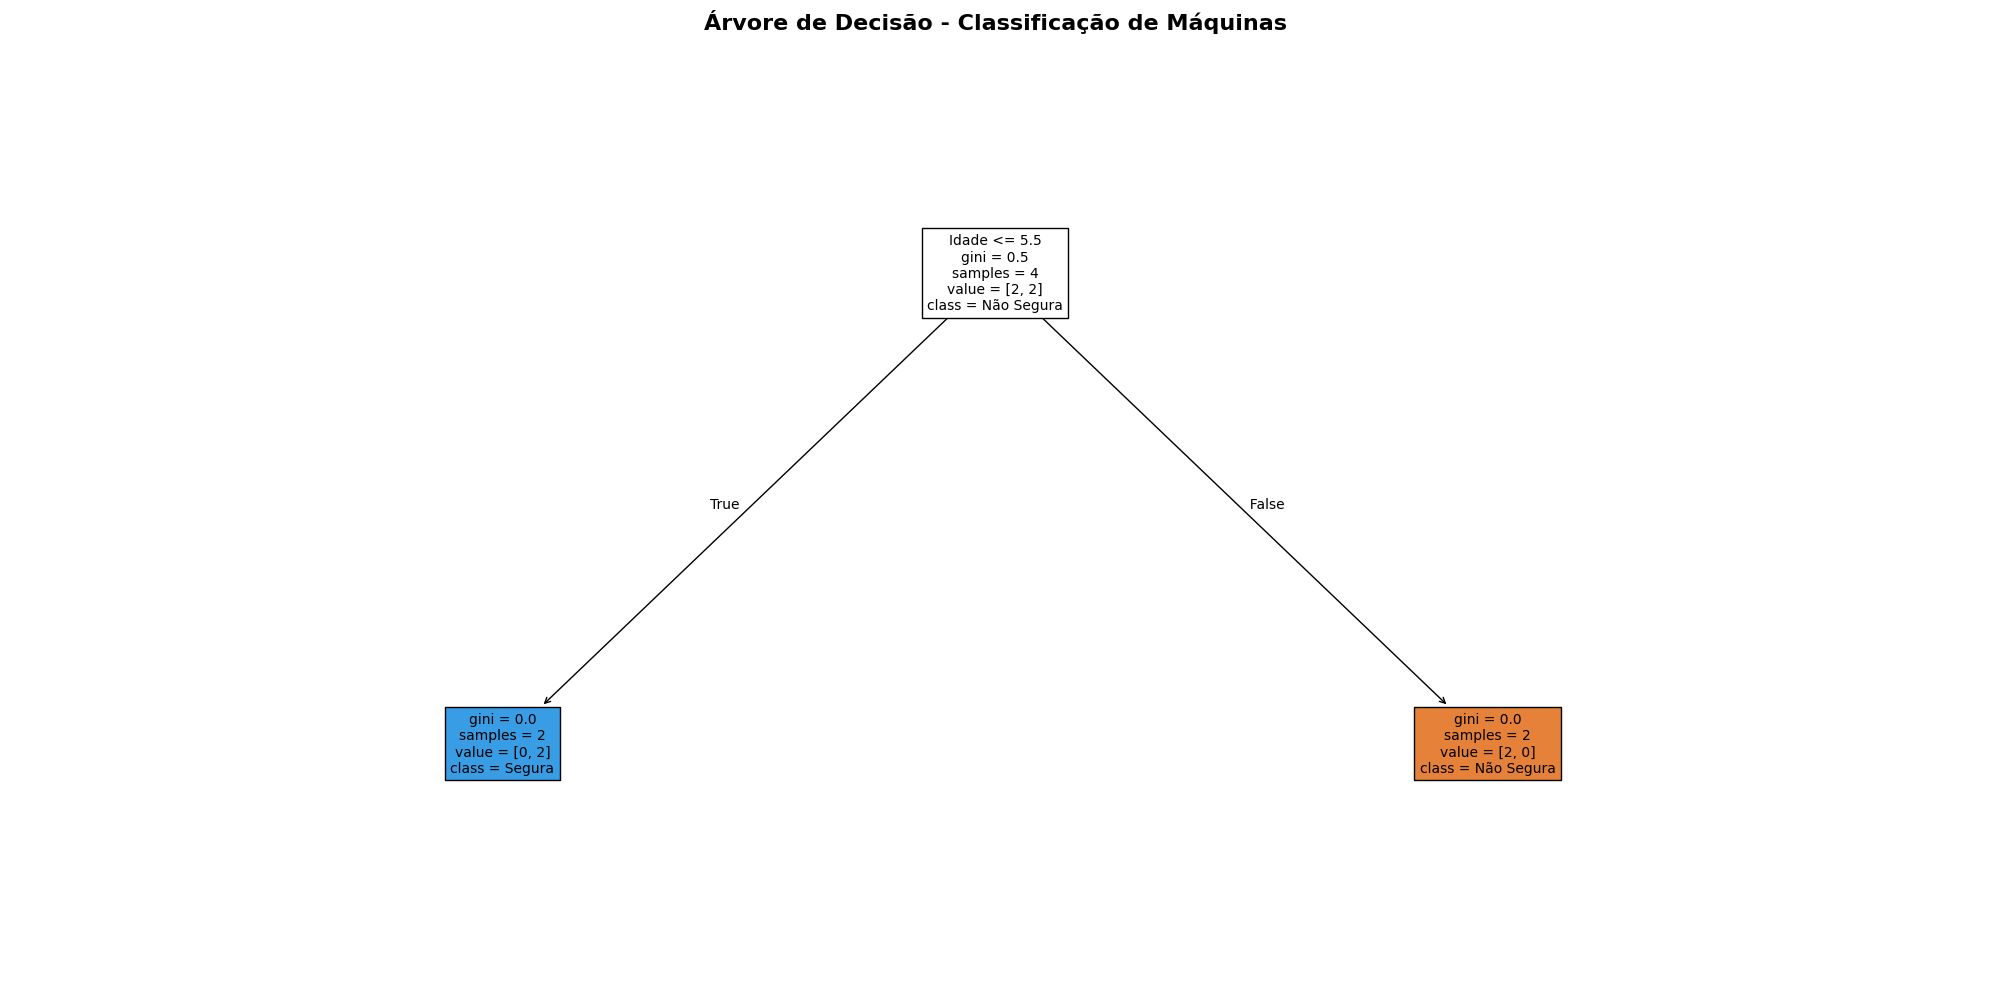

In [11]:
# Visualizando a Árvore de Decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(modelo, 
               feature_names=['Idade', 'Histórico Manutenção', 'Nº Falhas', 'Nível Automação'],
               class_names=['Não Segura', 'Segura'],
               filled=True,
               fontsize=10)
plt.title('Árvore de Decisão - Classificação de Máquinas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

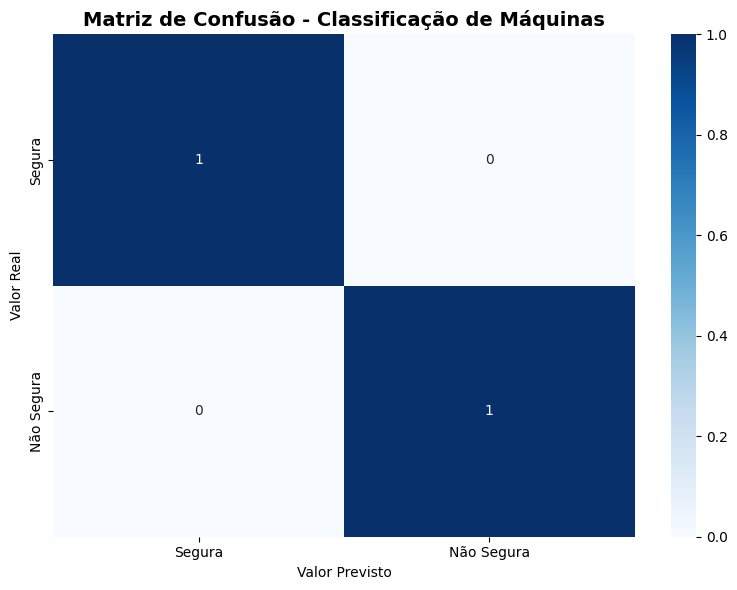

In [12]:
# Gráfico da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Segura', 'Não Segura'],
            yticklabels=['Segura', 'Não Segura'])
plt.title('Matriz de Confusão - Classificação de Máquinas', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.tight_layout()
plt.show()

In [14]:
# Testando novas máquinas
print("="*60)
print("TESTE COM NOVAS MÁQUINAS")
print("="*60)

TESTE COM NOVAS MÁQUINAS


In [15]:
# Nova máquina 1: Idade=7, Histórico=Bom, Falhas=1, Automação=Alto
nova_maquina1 = np.array([[7, 2, 1, 2]])
predicao1 = modelo.predict(nova_maquina1)
print(f"Máquina 1 (Idade=7, Histórico=Bom, Falhas=1, Automação=Alto): {predicao1[0]}")

Máquina 1 (Idade=7, Histórico=Bom, Falhas=1, Automação=Alto): Não Segura


In [16]:
# Nova máquina 2: Idade=12, Histórico=Ruim, Falhas=4, Automação=Baixo
nova_maquina2 = np.array([[12, 0, 4, 0]])
predicao2 = modelo.predict(nova_maquina2)
print(f"Máquina 2 (Idade=12, Histórico=Ruim, Falhas=4, Automação=Baixo): {predicao2[0]}")

print("\n" + "="*60)
print("ANÁLISE COMPLETA FINALIZADA!")
print("="*60)

Máquina 2 (Idade=12, Histórico=Ruim, Falhas=4, Automação=Baixo): Não Segura

ANÁLISE COMPLETA FINALIZADA!
